This ipython notebook will use the data frames for each year to plot things about education and immigration in the united states. It will be looking at college graduates and those patterns over the years

In [1]:
import pandas 
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

/home/casey/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
def line_plot(data,title,xlabel,ylabel,xticks,legend):
    plt.figure(figsize=(15,11))
    xvals = 0
    p = {}
    for i,val in enumerate(data):
        xvals = numpy.arange(len(val))
        p[i] = plt.plot(numpy.arange(len(val)),val)
    plt.title(title,fontsize=16)
    plt.xlabel(xlabel,fontsize=16)
    plt.ylabel(ylabel,fontsize=16)
    plt.xticks(xvals,xticks,fontsize=12)
    legend1 = [p[i][0] for i in p]
    plt.legend(legend1,legend,fontsize=12)
    
    import matplotlib.ticker as tkr
    formatter = tkr.ScalarFormatter(useMathText=False)
    formatter.set_scientific(False)
    
    plt.show()

Imports all of our data from all of the csvs

In [3]:
df_2014 = pandas.read_table('2014.csv')
df_2013 = pandas.read_table('2013.tsv')
df_2012 = pandas.read_table('2012.csv')
df_2011 = pandas.read_table('2011.csv')
df_2010 = pandas.read_table('2010.csv')
df_2009 = pandas.read_table('2009.csv')
df_2008 = pandas.read_table('2008.tsv')
df_2007 = pandas.read_table('2007.tsv')
df_2006 = pandas.read_table('2006.tsv')

These are all of the fields in this data frame.

In [4]:
df_2014

,Subject,Asia,Europe,Latin America,Africa,Northern America,Oceania,Total
0,Foreign-born population,12750422,4764822,21890416,1931203,812642,241200,42391794
1,CITIZENSHIP AND PERIOD OF ENTRY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Naturalized citizen,58.50%,64.10%,36.40%,52.90%,47.00%,38.00%,47.10%
3,Entered 2010 or later,1.10%,0.50%,0.60%,1.70%,0.60%,0.60%,0.80%
4,Entered 2000 to 2009,11.20%,8.60%,5.50%,19.70%,4.20%,7.60%,8.20%
5,Entered before 2000,46.20%,54.90%,30.40%,31.50%,42.20%,29.80%,38.10%
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Not a citizen,41.50%,35.90%,63.60%,47.10%,53.00%,62.00%,52.90%
8,Entered 2010 or later,16.80%,9.50%,8.10%,19.40%,12.50%,18.20%,11.50%
9,Entered 2000 to 2009,16.10%,11.30%,25.20%,19.10%,14.40%,23.90%,20.40%


In [5]:
def clean_dataFrame(data): 
    for i in range(len(data)): 
        row = data.iloc[i]
        for j in range(len(row)): 
            new_string = str(row.iloc[j]).strip('%')
            index = new_string.find(".")
            if (index > 0): ## float 
                row.iloc[j] = float(new_string) 
            elif(new_string.isdigit()): #integer
                row.iloc[j] = int(new_string)
    return data

In [6]:
df_2006 = clean_dataFrame(df_2006)
df_2007 = clean_dataFrame(df_2007)
df_2008 = clean_dataFrame(df_2008)
df_2009 = clean_dataFrame(df_2009)
df_2010 = clean_dataFrame(df_2010)
df_2011 = clean_dataFrame(df_2011)
df_2012 = clean_dataFrame(df_2012)
df_2013 = clean_dataFrame(df_2013)
df_2014 = clean_dataFrame(df_2014)

In [7]:
df_2014[df_2014.Subject == "Bachelor's degree"]

,Subject,Asia,Europe,Latin America,Africa,Northern America,Oceania,Total
24,Bachelor's degree,28,20.2,8.1,23.6,24.6,19.6,16.5


In [8]:
Asia_college = pandas.Series([df_2006[df_2006.Subject == "College or graduate school"].Asia.iloc[0],
                    df_2007[df_2007.Subject == "College or graduate school"].Asia.iloc[0], 
                    df_2008[df_2008.Subject == "College or graduate school"].Asia.iloc[0], 
                    df_2009[df_2009.Subject == "College or graduate school"].Asia.iloc[0],
                    df_2010[df_2010.Subject == "College or graduate school"].Asia.iloc[0],
                    df_2011[df_2011.Subject == "College or graduate school"].Asia.iloc[0], 
                    df_2012[df_2012.Subject == "College or graduate school"].Asia.iloc[0], 
                      df_2013[df_2013.Subject == "College or graduate school"].Asia.iloc[0]])
Europe_college = pandas.Series([df_2006[df_2006.Subject == "College or graduate school"].Europe.iloc[0],
                    df_2007[df_2007.Subject == "College or graduate school"].Europe.iloc[0], 
                    df_2008[df_2008.Subject == "College or graduate school"].Europe.iloc[0], 
                    df_2009[df_2009.Subject == "College or graduate school"].Europe.iloc[0],
                    df_2010[df_2010.Subject == "College or graduate school"].Europe.iloc[0],
                    df_2011[df_2011.Subject == "College or graduate school"].Europe.iloc[0], 
                    df_2012[df_2012.Subject == "College or graduate school"].Europe.iloc[0], 
                      df_2013[df_2013.Subject == "College or graduate school"].Europe.iloc[0]])
Latin_America_college = pandas.Series([df_2006[df_2006.Subject == "College or graduate school"]['Latin America'].iloc[0],
                    df_2007[df_2007.Subject == "College or graduate school"]['Latin America'].iloc[0], 
                    df_2008[df_2008.Subject == "College or graduate school"]['Latin America'].iloc[0], 
                    df_2009[df_2009.Subject == "College or graduate school"]['Latin America'].iloc[0],
                    df_2010[df_2010.Subject == "College or graduate school"]['Latin America'].iloc[0],
                    df_2011[df_2011.Subject == "College or graduate school"]['Latin America'].iloc[0], 
                    df_2012[df_2012.Subject == "College or graduate school"]['Latin America'].iloc[0], 
                      df_2013[df_2013.Subject == "College or graduate school"]['Latin America'].iloc[0]])
Africa_college = pandas.Series([df_2006[df_2006.Subject == "College or graduate school"].Africa.iloc[0],
                    df_2007[df_2007.Subject == "College or graduate school"].Africa.iloc[0], 
                    df_2008[df_2008.Subject == "College or graduate school"].Africa.iloc[0], 
                    df_2009[df_2009.Subject == "College or graduate school"].Africa.iloc[0],
                    df_2010[df_2010.Subject == "College or graduate school"].Africa.iloc[0],
                    df_2011[df_2011.Subject == "College or graduate school"].Africa.iloc[0], 
                    df_2012[df_2012.Subject == "College or graduate school"].Africa.iloc[0], 
                      df_2013[df_2013.Subject == "College or graduate school"].Africa.iloc[0]])
Oceania_college = pandas.Series([df_2006[df_2006.Subject == "College or graduate school"].Oceania.iloc[0],
                    df_2007[df_2007.Subject == "College or graduate school"].Oceania.iloc[0], 
                    df_2008[df_2008.Subject == "College or graduate school"].Oceania.iloc[0], 
                    df_2009[df_2009.Subject == "College or graduate school"].Oceania.iloc[0],
                    df_2010[df_2010.Subject == "College or graduate school"].Oceania.iloc[0],
                    df_2011[df_2011.Subject == "College or graduate school"].Oceania.iloc[0], 
                    df_2012[df_2012.Subject == "College or graduate school"].Oceania.iloc[0], 
                      df_2013[df_2013.Subject == "College or graduate school"].Oceania.iloc[0]])

In [9]:
Northern_America_college = pandas.Series([df_2006[df_2006.Subject == "College or graduate school"]["Northern America"].iloc[0],
                    df_2007[df_2007.Subject == "College or graduate school"]["Northern America"].iloc[0], 
                    df_2008[df_2008.Subject == "College or graduate school"]["Northern American"].iloc[0], 
                    df_2009[df_2009.Subject == "College or graduate school"]["Northern America"].iloc[0],
                    df_2010[df_2010.Subject == "College or graduate school"]["Northern America"].iloc[0],
                    df_2011[df_2011.Subject == "College or graduate school"]["Northern America"].iloc[0], 
                    df_2012[df_2012.Subject == "College or graduate school"]["Northern America"].iloc[0], 
                      df_2013[df_2013.Subject == "College or graduate school"]["Northern America"].iloc[0]])

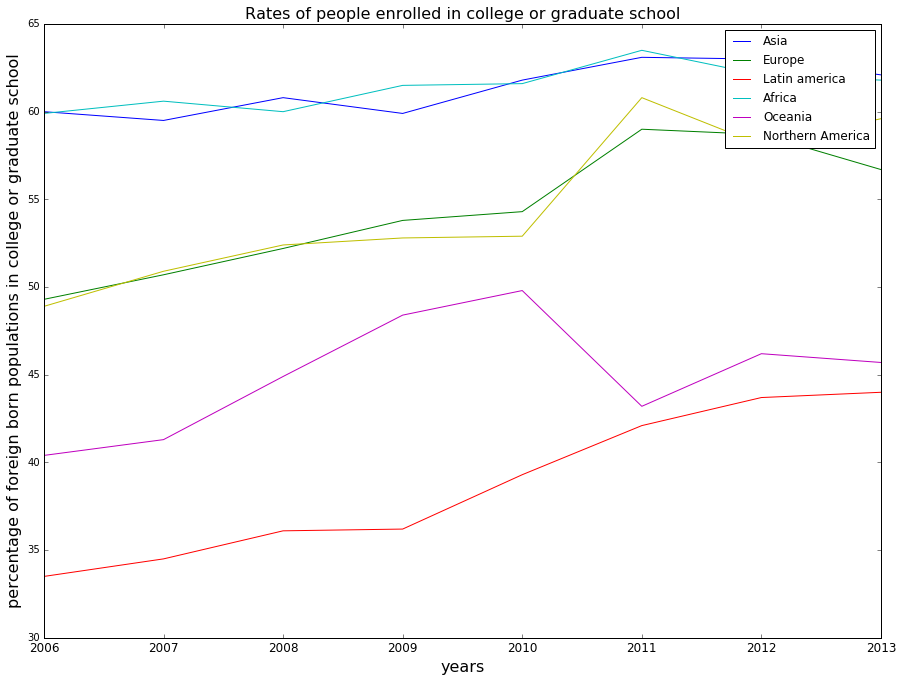

In [13]:
line_plot([Asia_college, Europe_college, Latin_America_college, Africa_college, Oceania_college, Northern_America_college], 
          "Rates of people enrolled in college or graduate school", "years", "percentage of foreign born populations in college or graduate school", 
         ['2006','2007','2008','2009','2010','2011','2012','2013','2014'],
          ["Asia", "Europe", "Latin america", "Africa", "Oceania", "Northern America"])

In [283]:
df_2013[df_2013.Subject == "Bachelor's degree"].Asia.iloc[0]

27.9

In [284]:
Asia_bachelor = pandas.Series([df_2006[df_2006.Subject == "Bachelor's degree"].Asia.iloc[0],
                    df_2007[df_2007.Subject == "Bachelor's degree"].Asia.iloc[0], 
                    df_2008[df_2008.Subject == "Bachelor's degree"].Asia.iloc[0], 
                    df_2009[df_2009.Subject == "Bachelor's degree"].Asia.iloc[0],
                    df_2010[df_2010.Subject == "Bachelor's degree"].Asia.iloc[0],
                    df_2011[df_2011.Subject == "Bachelor's degree"].Asia.iloc[0], 
                    df_2012[df_2012.Subject == "Bachelor's degree"].Asia.iloc[0], 
                      df_2013[df_2013.Subject == "Bachelor's degree"].Asia.iloc[0]])
Europe_bachelor = pandas.Series([df_2006[df_2006.Subject == "Bachelor's degree"].Europe.iloc[0],
                    df_2007[df_2007.Subject == "Bachelor's degree"].Europe.iloc[0], 
                    df_2008[df_2008.Subject == "Bachelor's degree"].Europe.iloc[0], 
                    df_2009[df_2009.Subject == "Bachelor's degree"].Europe.iloc[0],
                    df_2010[df_2010.Subject == "Bachelor's degree"].Europe.iloc[0],
                    df_2011[df_2011.Subject == "Bachelor's degree"].Europe.iloc[0], 
                    df_2012[df_2012.Subject == "Bachelor's degree"].Europe.iloc[0], 
                      df_2013[df_2013.Subject == "Bachelor's degree"].Europe.iloc[0]])
Latin_America_bachelor = pandas.Series([df_2006[df_2006.Subject == "Bachelor's degree"]['Latin America'].iloc[0],
                    df_2007[df_2007.Subject == "Bachelor's degree"]['Latin America'].iloc[0], 
                    df_2008[df_2008.Subject == "Bachelor's degree"]['Latin America'].iloc[0], 
                    df_2009[df_2009.Subject == "Bachelor's degree"]['Latin America'].iloc[0],
                    df_2010[df_2010.Subject == "Bachelor's degree"]['Latin America'].iloc[0],
                    df_2011[df_2011.Subject == "Bachelor's degree"]['Latin America'].iloc[0], 
                    df_2012[df_2012.Subject == "Bachelor's degree"]['Latin America'].iloc[0], 
                      df_2013[df_2013.Subject == "Bachelor's degree"]['Latin America'].iloc[0]])
Africa_bachelor = pandas.Series([df_2006[df_2006.Subject == "Bachelor's degree"].Africa.iloc[0],
                    df_2007[df_2007.Subject == "Bachelor's degree"].Africa.iloc[0], 
                    df_2008[df_2008.Subject == "Bachelor's degree"].Africa.iloc[0], 
                    df_2009[df_2009.Subject == "Bachelor's degree"].Africa.iloc[0],
                    df_2010[df_2010.Subject == "Bachelor's degree"].Africa.iloc[0],
                    df_2011[df_2011.Subject == "Bachelor's degree"].Africa.iloc[0], 
                    df_2012[df_2012.Subject == "Bachelor's degree"].Africa.iloc[0], 
                      df_2013[df_2013.Subject == "Bachelor's degree"].Africa.iloc[0]])
Oceania_bachelor = pandas.Series([df_2006[df_2006.Subject == "Bachelor's degree"].Oceania.iloc[0],
                    df_2007[df_2007.Subject == "Bachelor's degree"].Oceania.iloc[0], 
                    df_2008[df_2008.Subject == "Bachelor's degree"].Oceania.iloc[0], 
                    df_2009[df_2009.Subject == "Bachelor's degree"].Oceania.iloc[0],
                    df_2010[df_2010.Subject == "Bachelor's degree"].Oceania.iloc[0],
                    df_2011[df_2011.Subject == "Bachelor's degree"].Oceania.iloc[0], 
                    df_2012[df_2012.Subject == "Bachelor's degree"].Oceania.iloc[0], 
                      df_2013[df_2013.Subject == "Bachelor's degree"].Oceania.iloc[0]])

In [285]:
Northern_America_bachelor = pandas.Series([df_2006[df_2006.Subject == "Bachelor's degree"]['Northern America'].iloc[0],
                    df_2007[df_2007.Subject == "Bachelor's degree"]['Northern America'].iloc[0], 
                    df_2008[df_2008.Subject == "Bachelor's degree"]['Northern American'].iloc[0], 
                    df_2009[df_2009.Subject == "Bachelor's degree"]['Northern America'].iloc[0],
                    df_2010[df_2010.Subject == "Bachelor's degree"]['Northern America'].iloc[0],
                    df_2011[df_2011.Subject == "Bachelor's degree"]['Northern America'].iloc[0], 
                    df_2012[df_2012.Subject == "Bachelor's degree"]['Northern America'].iloc[0], 
                      df_2013[df_2013.Subject == "Bachelor's degree"]['Northern America'].iloc[0]])

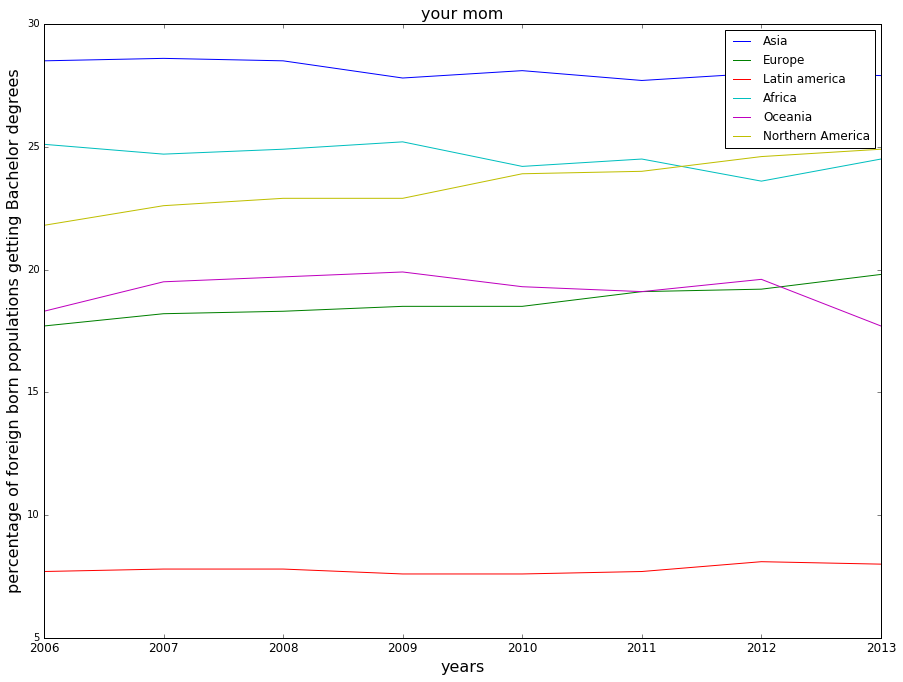

In [286]:
line_plot([Asia_bachelor, Europe_bachelor, Latin_America_bachelor, Africa_bachelor, Oceania_bachelor, Northern_America_bachelor], 
          "your mom", "years", "percentage of foreign born populations getting Bachelor degrees", 
         ['2006','2007','2008','2009','2010','2011','2012','2013','2014'],
         ["Asia", "Europe", "Latin america", "Africa", "Oceania", "Northern America"])

In [287]:
Asia_graduate = pandas.Series([df_2006[df_2006.Subject == "Graduate or professional degree"].Asia.iloc[0],
                    df_2007[df_2007.Subject == "Graduate or professional degree"].Asia.iloc[0], 
                    df_2008[df_2008.Subject == "Graduate or professional degree"].Asia.iloc[0], 
                    df_2009[df_2009.Subject == "Graduate or professional degree"].Asia.iloc[0],
                    df_2010[df_2010.Subject == "Graduate or professional degree"].Asia.iloc[0],
                    df_2011[df_2011.Subject == "Graduate or professional degree"].Asia.iloc[0], 
                    df_2012[df_2012.Subject == "Graduate or professional degree"].Asia.iloc[0], 
                      df_2013[df_2013.Subject == "Graduate or professional degree"].Asia.iloc[0]])
Europe_graduate = pandas.Series([df_2006[df_2006.Subject == "Graduate or professional degree"].Europe.iloc[0],
                    df_2007[df_2007.Subject == "Graduate or professional degree"].Europe.iloc[0], 
                    df_2008[df_2008.Subject == "Graduate or professional degree"].Europe.iloc[0], 
                    df_2009[df_2009.Subject == "Graduate or professional degree"].Europe.iloc[0],
                    df_2010[df_2010.Subject == "Graduate or professional degree"].Europe.iloc[0],
                    df_2011[df_2011.Subject == "Graduate or professional degree"].Europe.iloc[0], 
                    df_2012[df_2012.Subject == "Graduate or professional degree"].Europe.iloc[0], 
                      df_2013[df_2013.Subject == "Graduate or professional degree"].Europe.iloc[0]])
Latin_America_graduate = pandas.Series([df_2006[df_2006.Subject == "Graduate or professional degree"]['Latin America'].iloc[0],
                    df_2007[df_2007.Subject == "Graduate or professional degree"]['Latin America'].iloc[0], 
                    df_2008[df_2008.Subject == "Graduate or professional degree"]['Latin America'].iloc[0], 
                    df_2009[df_2009.Subject == "Graduate or professional degree"]['Latin America'].iloc[0],
                    df_2010[df_2010.Subject == "Graduate or professional degree"]['Latin America'].iloc[0],
                    df_2011[df_2011.Subject == "Graduate or professional degree"]['Latin America'].iloc[0], 
                    df_2012[df_2012.Subject == "Graduate or professional degree"]['Latin America'].iloc[0], 
                      df_2013[df_2013.Subject == "Graduate or professional degree"]['Latin America'].iloc[0]])
Africa_graduate = pandas.Series([df_2006[df_2006.Subject == "Graduate or professional degree"].Africa.iloc[0],
                    df_2007[df_2007.Subject == "Graduate or professional degree"].Africa.iloc[0], 
                    df_2008[df_2008.Subject == "Graduate or professional degree"].Africa.iloc[0], 
                    df_2009[df_2009.Subject == "Graduate or professional degree"].Africa.iloc[0],
                    df_2010[df_2010.Subject == "Graduate or professional degree"].Africa.iloc[0],
                    df_2011[df_2011.Subject == "Graduate or professional degree"].Africa.iloc[0], 
                    df_2012[df_2012.Subject == "Graduate or professional degree"].Africa.iloc[0], 
                      df_2013[df_2013.Subject == "Graduate or professional degree"].Africa.iloc[0]])
Oceania_graduate = pandas.Series([df_2006[df_2006.Subject == "Graduate or professional degree"].Oceania.iloc[0],
                    df_2007[df_2007.Subject == "Graduate or professional degree"].Oceania.iloc[0], 
                    df_2008[df_2008.Subject == "Graduate or professional degree"].Oceania.iloc[0], 
                    df_2009[df_2009.Subject == "Graduate or professional degree"].Oceania.iloc[0],
                    df_2010[df_2010.Subject == "Graduate or professional degree"].Oceania.iloc[0],
                    df_2011[df_2011.Subject == "Graduate or professional degree"].Oceania.iloc[0], 
                    df_2012[df_2012.Subject == "Graduate or professional degree"].Oceania.iloc[0], 
                      df_2013[df_2013.Subject == "Graduate or professional degree"].Oceania.iloc[0]])
Northern_America_graduate = pandas.Series([df_2006[df_2006.Subject == "Graduate or professional degree"]['Northern America'].iloc[0],
                    df_2007[df_2007.Subject == "Graduate or professional degree"]['Northern America'].iloc[0], 
                    df_2008[df_2008.Subject == "Graduate or professional degree"]['Northern American'].iloc[0], 
                    df_2009[df_2009.Subject == "Graduate or professional degree"]['Northern America'].iloc[0],
                    df_2010[df_2010.Subject == "Graduate or professional degree"]['Northern America'].iloc[0],
                    df_2011[df_2011.Subject == "Graduate or professional degree"]['Northern America'].iloc[0], 
                    df_2012[df_2012.Subject == "Graduate or professional degree"]['Northern America'].iloc[0], 
                      df_2013[df_2013.Subject == "Graduate or professional degree"]['Northern America'].iloc[0]])

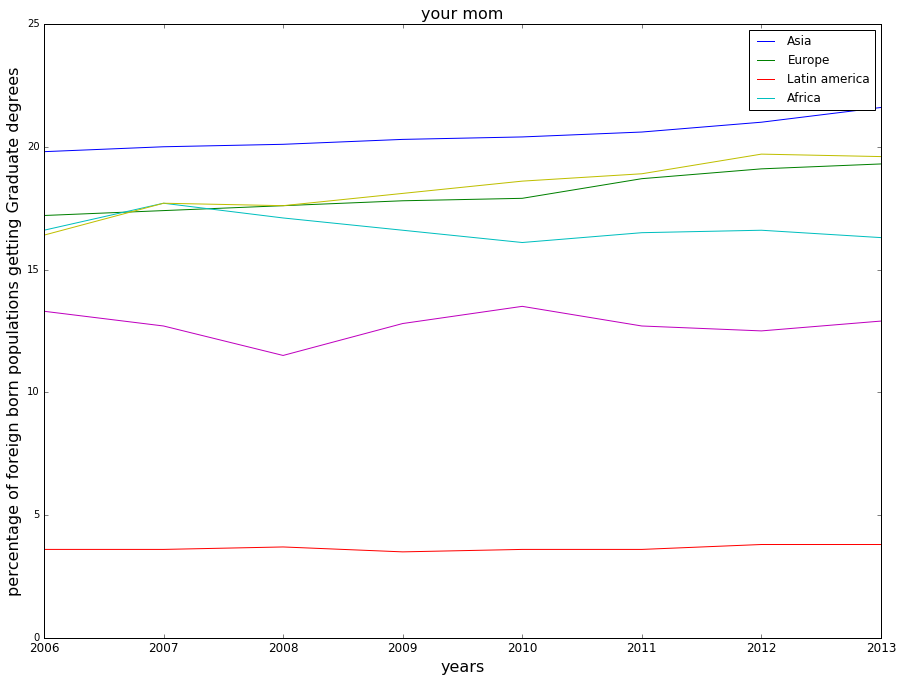

In [289]:
line_plot([Asia_graduate, Europe_graduate, Latin_America_graduate, Africa_graduate, Oceania_graduate, Northern_America_graduate], 
          "your mom", "years", "percentage of foreign born populations getting Graduate degrees", 
         ['2006','2007','2008','2009','2010','2011','2012','2013','2014'], 
         ["Asia", "Europe", "Latin america", "Africa"])